# Import Section

In [27]:
import numpy as np
from syncsweptsine import SyncSweep, LinearModel, HigherHarmonicImpulseResponse, FrfFilterKernel

## Import Virtual Sound Field

In [2]:
# SOUND_FIELD = lambda x: x.copy()

from pysndfx import AudioEffectsChain
SOUND_FIELD = AudioEffectsChain().reverb()

## import Warning Controller

In [3]:
from warnings import simplefilter
simplefilter('ignore')

# Define Global Variables

## Sample rate [Hz]

In [4]:
RATE = 48000

## Total Time Length of Source [sec]

In [5]:
LEN_T = 180

## Freq of Source [Hz]

In [6]:
FREQ = 440

## Time-Axis

In [7]:
t = np.linspace(0, LEN_T, LEN_T*RATE, dtype=np.float64)

## About FIR-Filter

### Filter Length

In [8]:
LEN_FIR = 2048

## Make Source-Data

In [9]:
A = np.finfo(np.float64).max / 2.
rawdata = A * np.sin(2. * np.pi * FREQ * t)

# Main

In [10]:
ssweep = SyncSweep(startfreq=10, stopfreq=RATE//2, durationappr=10, samplerate=RATE)
indata = np.array(ssweep, dtype=np.float64)
print(ssweep, indata.shape)

SyncSweep(
    startfreq=10,
    stopfreq=24000,
    duration=10.118191221236849,
    samplerate=48000)
 (485674,)


In [11]:
outdata = SOUND_FIELD(indata)
outdata.shape

(485674,)

In [30]:
hhir = HigherHarmonicImpulseResponse.from_sweeps(syncsweep=ssweep, measuredsweep=outdata)
FIR = FrfFilterKernel.from_sweeps(syncsweep=ssweep, measuredsweep=outdata)
FIR

AttributeError: type object 'FrfFilterKernel' has no attribute 'from_sweeps'

In [13]:
indata_modified = FIR.filter(rawdata)
outdata_modified = SOUND_FIELD(indata_modified)

# Plot

In [21]:
from matplotlib import pylab as plt
import seaborn as sns

sns.set()
sns.set_context('paper')
sns.set_palette('winter', 2)

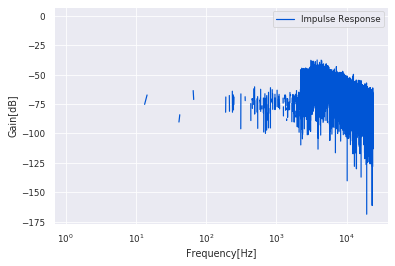

In [22]:
plt.plot(FIR.kernel.freq, 20.*np.log10(FIR.kernel.ir[-FIR.kernel.freq.size:]), label='Impulse Response')
plt.xscale('log')
plt.xlabel('Frequency[Hz]')
plt.ylabel('Gain[dB]')
plt.legend()
plt.show()

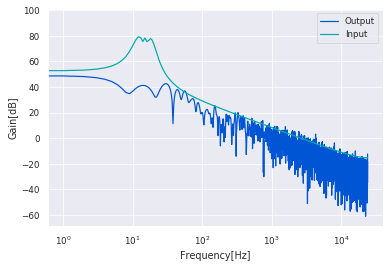

In [23]:
from scipy.fft import rfft
plt.plot(20.*np.log10(rfft(outdata_modified, n=RATE)), label='Output')
plt.plot(20.*np.log10(rfft(indata, n=RATE)), label='Input')
plt.xscale('log')
plt.xlabel('Frequency[Hz]')
plt.ylabel('Gain[dB]')
plt.legend()
plt.show()